<a href="https://colab.research.google.com/github/zakaria-grid/ML-GridPack/blob/ML_classification_fault_location/classification_ML_comparison_analysis___Augmented_dataset_(BFault_9%2C99%2C999).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import numpy as np
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score, KFold, train_test_split, learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from google.colab import drive
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,multilabel_confusion_matrix,confusion_matrix,accuracy_score, mean_squared_error, explained_variance_score, make_scorer, mean_absolute_error, r2_score
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.utils import np_utils
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/GridPack_Dataset'

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/GridPack_Dataset


In [0]:
dataframe = pandas.read_csv("all_buses_bf_9_99_999_classification.csv")


dataset = dataframe.values
X = dataset[2:,1:22].astype(float)
y = dataset[2:,22].astype(float)


#Split the data into trining and testing parts
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [70]:
# Neural Network (MLP)

nn=MLPClassifier(max_iter=1000, activation='relu').fit(X_train,y_train)
nn_prediction = nn.predict(X_test)
accuracy_nn=accuracy_score(y_test,nn_prediction)
print("Accuracy (%): "+str(accuracy_nn)) 

nn_2=MLPClassifier(max_iter=1000, activation='tanh').fit(X_train,y_train)
nn_prediction2 = nn_2.predict(X_test)
accuracy_nn_2=accuracy_score(y_test,nn_prediction2)
print("Accuracy (%) "+str(accuracy_nn_2)) 

#confusion matrix and TP, FP, FN, FP


cnf_matrix = confusion_matrix(y_test, nn_prediction)

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print(TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)


pmd=FN/(TP+FN)
print ("Probability of miss detection (%)"+str(pmd*100))

pd=TP/(TP+FN)
print ("Probability of  detection (%)"+str(pd*100))

pf=FP/(FP+TN)
print ("Probability of false alarm (%)"+str(pf*100))

print('accuracy (%) '+str(ACC))

Accuracy (%): 0.8504312717929895
Accuracy (%) 0.8018902550926775
[0.81738544 0.81148122 0.93943662 0.81373391 0.97103129 0.8464991
 0.88685814 0.69190601 0.90376203]
Probability of miss detection (%)[18.26145553 18.8518781   6.05633803 18.62660944  2.89687138 15.35008977
 11.31418625 30.80939948  9.62379703]
Probability of  detection (%)[81.73854447 81.1481219  93.94366197 81.37339056 97.10312862 84.64991023
 88.68581375 69.19060052 90.37620297]
Probability of false alarm (%)[0.84979817 1.42299989 1.43490188 2.98982842 1.48480319 1.42068684
 2.75925736 2.93363422 1.48641722]
accuracy (%) [0.96779226 0.96320426 0.97962929 0.95338594 0.98403377 0.97155441
 0.96338778 0.94127363 0.97660121]


Text(0.5, 1.0, 'Neural Network')

<Figure size 432x288 with 0 Axes>

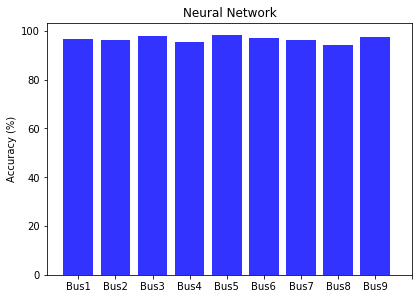

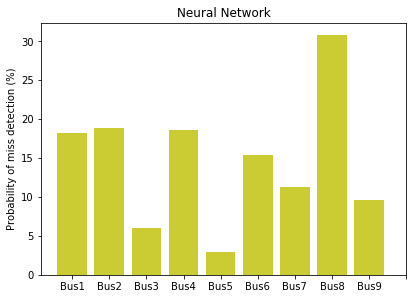

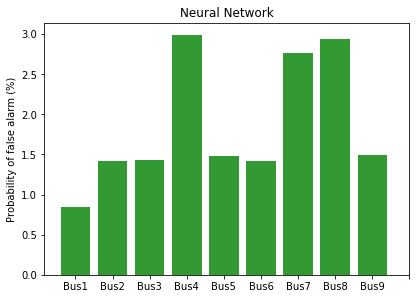

In [75]:
buses = ('Bus1', 'Bus2', 'Bus3', 'Bus4', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9')
y_pos = np.arange(len(buses)-1)
fig = plt.figure()

ACC_results = [j *100 for j in ACC]
pmd_results=[j *100 for j in pmd]
pf_results=[j *100 for j in pf]

fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, i)
ax.bar(y_pos, ACC_results, align='center', alpha=0.8, color='b')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Accuracy (%)')
ax.set_title('Neural Network')


fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, i)
ax.bar(y_pos, pmd_results, align='center', alpha=0.8, color='y')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of miss detection (%)')
ax.set_title('Neural Network')

fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, i)
ax.bar(y_pos, pf_results, align='center', alpha=0.8, color='g')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of false alarm (%)')
ax.set_title('Neural Network')

In [76]:
#DNN 
model = Sequential()
model.add(Dense(20, input_dim=21, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, activation='softmax'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, verbose=0)
dnn_prediction=model.predict(X_test)
accuracy_dnn=accuracy_score(y_test,dnn_prediction)
print("Accuracy (%): "+str(accuracy_dnn)) 


#confusion matrix and TP, FP, FN, FP


cnf_matrix = confusion_matrix(y_test, dnn_prediction)

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)














Accuracy (%): 0.13617177463754818


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in true_divide


Text(0.5, 1.0, 'Deep Neural Network')

<Figure size 432x288 with 0 Axes>

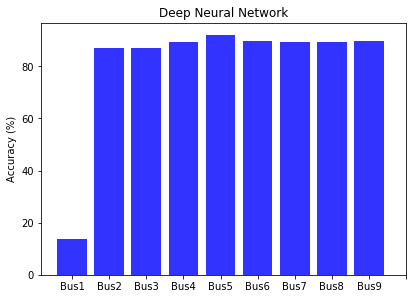

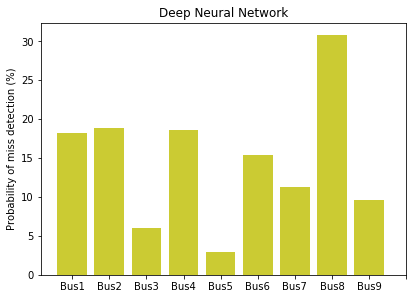

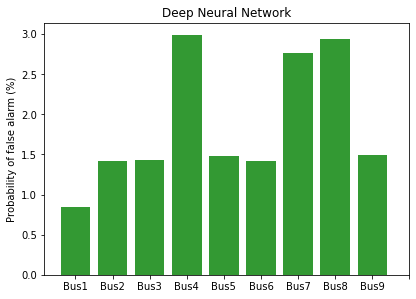

In [77]:
buses = ('Bus1', 'Bus2', 'Bus3', 'Bus4', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9')
y_pos = np.arange(len(buses)-1)
fig = plt.figure()

ACC_results = [j *100 for j in ACC]
pmd_results=[j *100 for j in pmd]
pf_results=[j *100 for j in pf]

fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, i)
ax.bar(y_pos, ACC_results, align='center', alpha=0.8, color='b')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Accuracy (%)')
ax.set_title('Deep Neural Network')


fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, i)
ax.bar(y_pos, pmd_results, align='center', alpha=0.8, color='y')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of miss detection (%)')
ax.set_title('Deep Neural Network')

fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, i)
ax.bar(y_pos, pf_results, align='center', alpha=0.8, color='g')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of false alarm (%)')
ax.set_title('Deep Neural Network')

In [78]:
# training SVC classifier with an RBF kernel
svm_model = SVC(kernel = 'rbf', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model.predict(X_test)  
accuracy_svm=accuracy_score(y_test,svm_predictions)
print("Accuracy (%): "+str(accuracy_svm)) 

# training SVR classifier with a linear kernel
svm_model_2 = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions_2 = svm_model_2.predict(X_test)  
accuracy_svm_2=accuracy_score(y_test,svm_predictions_2)
print("Accuracy (%): "+str(accuracy_svm_2)) 

#confusion matrix
cnf_matrix = confusion_matrix(y_test, svm_predictions)

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

Accuracy (%): 0.2951917783079464
Accuracy (%): 0.27537162782161867


Text(0.5, 1.0, 'Support Vector Machine')

<Figure size 432x288 with 0 Axes>

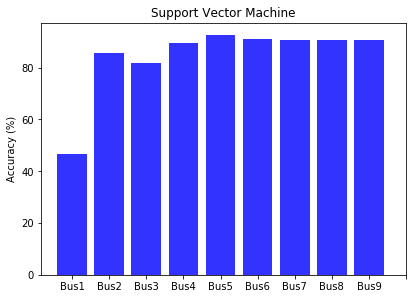

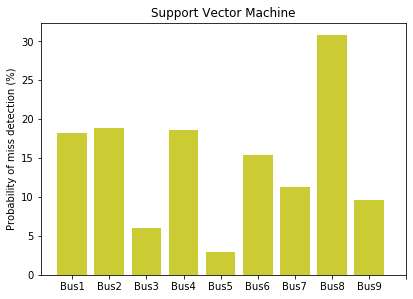

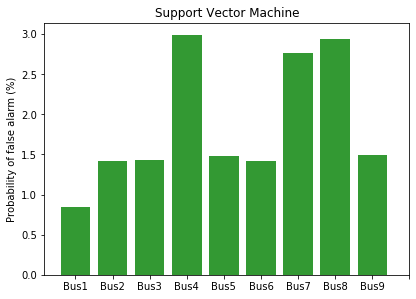

In [81]:
buses = ('Bus1', 'Bus2', 'Bus3', 'Bus4', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9')
y_pos = np.arange(len(buses)-1)
fig = plt.figure()

ACC_results = [j *100 for j in ACC]
pmd_results=[j *100 for j in pmd]
pf_results=[j *100 for j in pf]

fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, i)
ax.bar(y_pos, ACC_results, align='center', alpha=0.8, color='b')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Accuracy (%)')
ax.set_title('Support Vector Machine')


fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, i)
ax.bar(y_pos, pmd_results, align='center', alpha=0.8, color='y')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of miss detection (%)')
ax.set_title('Support Vector Machine')

fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, i)
ax.bar(y_pos, pf_results, align='center', alpha=0.8, color='g')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of false alarm (%)')
ax.set_title('Support Vector Machine')

In [82]:
#KNN
knn = KNeighborsClassifier().fit(X_train, y_train) 
knn_predictions = knn.predict(X_test)  
accuracy_knn=accuracy_score(y_test,knn_predictions)
print("Accuracy (%): "+str(accuracy_knn)) 

#confusion matrix
cnf_matrix = confusion_matrix(y_test, knn_predictions)

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

Accuracy (%): 0.4494402642686732


Text(0.5, 1.0, 'KNN')

<Figure size 432x288 with 0 Axes>

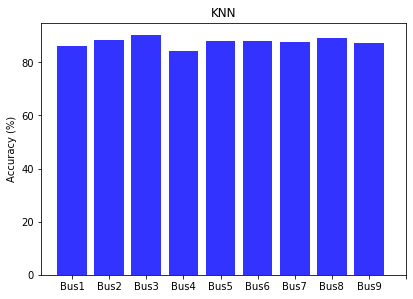

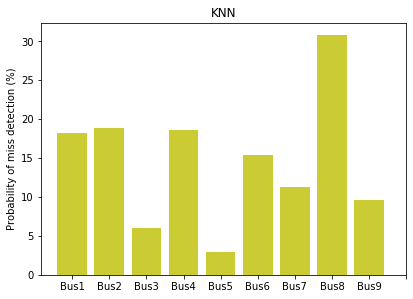

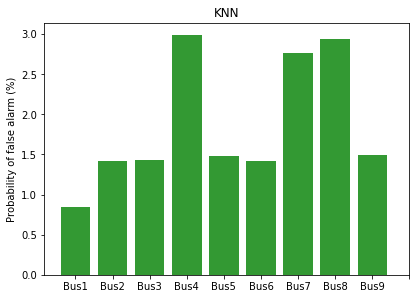

In [83]:
buses = ('Bus1', 'Bus2', 'Bus3', 'Bus4', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9')
y_pos = np.arange(len(buses)-1)
fig = plt.figure()

ACC_results = [j *100 for j in ACC]
pmd_results=[j *100 for j in pmd]
pf_results=[j *100 for j in pf]

fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, i)
ax.bar(y_pos, ACC_results, align='center', alpha=0.8, color='b')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Accuracy (%)')
ax.set_title('KNN')


fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, i)
ax.bar(y_pos, pmd_results, align='center', alpha=0.8, color='y')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of miss detection (%)')
ax.set_title('KNN')

fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, i)
ax.bar(y_pos, pf_results, align='center', alpha=0.8, color='g')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of false alarm (%)')
ax.set_title('KNN')

In [84]:
#NB
gnb =GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
accuracy_nb=accuracy_score(y_test,gnb_predictions)
print("Accuracy (%): "+str(accuracy_nb)) 

#confusion matrix
cnf_matrix = confusion_matrix(y_test, gnb_predictions)

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)


FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

Accuracy (%): 0.1953569462286658


Text(0.5, 1.0, 'NB')

<Figure size 432x288 with 0 Axes>

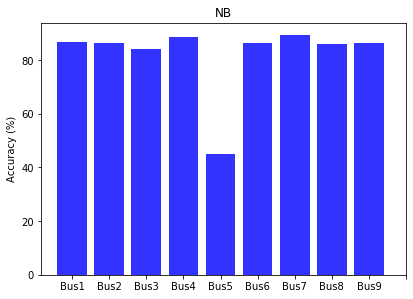

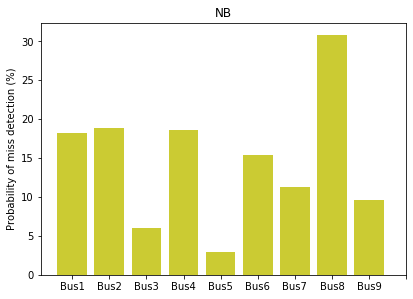

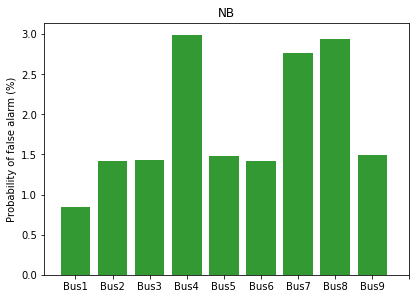

In [85]:
buses = ('Bus1', 'Bus2', 'Bus3', 'Bus4', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9')
y_pos = np.arange(len(buses)-1)
fig = plt.figure()

ACC_results = [j *100 for j in ACC]
pmd_results=[j *100 for j in pmd]
pf_results=[j *100 for j in pf]

fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, i)
ax.bar(y_pos, ACC_results, align='center', alpha=0.8, color='b')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Accuracy (%)')
ax.set_title('NB')


fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, i)
ax.bar(y_pos, pmd_results, align='center', alpha=0.8, color='y')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of miss detection (%)')
ax.set_title('NB')

fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, i)
ax.bar(y_pos, pf_results, align='center', alpha=0.8, color='g')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of false alarm (%)')
ax.set_title('NB')

In [86]:

#DT
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
dtree_prediction = dtree_model.predict(X_test) 
accuracy_dt=accuracy_score(y_test,dtree_prediction)
print("Accuracy (%): "+str(accuracy_dt))

#confusion matrix
cnf_matrix = confusion_matrix(y_test, dtree_prediction)

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)


FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

Accuracy (%): 0.2505046797577537


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


Text(0.5, 1.0, 'DT')

<Figure size 432x288 with 0 Axes>

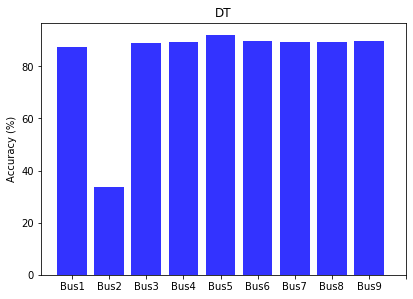

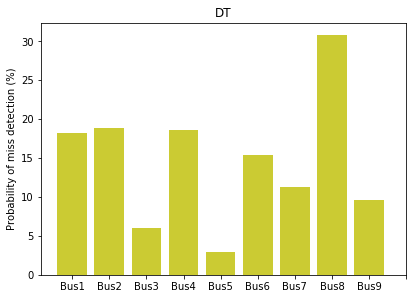

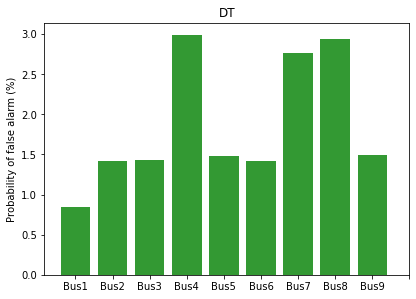

In [87]:
buses = ('Bus1', 'Bus2', 'Bus3', 'Bus4', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9')
y_pos = np.arange(len(buses)-1)
fig = plt.figure()

ACC_results = [j *100 for j in ACC]
pmd_results=[j *100 for j in pmd]
pf_results=[j *100 for j in pf]

fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, i)
ax.bar(y_pos, ACC_results, align='center', alpha=0.8, color='b')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Accuracy (%)')
ax.set_title('DT')


fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, i)
ax.bar(y_pos, pmd_results, align='center', alpha=0.8, color='y')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of miss detection (%)')
ax.set_title('DT')

fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, i)
ax.bar(y_pos, pf_results, align='center', alpha=0.8, color='g')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of false alarm (%)')
ax.set_title('DT')

In [90]:

#RF
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_prediction=rf.predict(X_test)
accuracy_rf=accuracy_score(y_test,rf_prediction)
print("Accuracy (%): "+str(accuracy_rf))


#confusion matrix
cnf_matrix = confusion_matrix(y_test, rf_prediction)

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)


FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)


Accuracy (%): 0.8956689300789136


Text(0.5, 1.0, 'RF')

<Figure size 432x288 with 0 Axes>

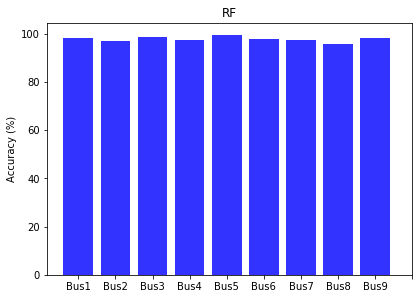

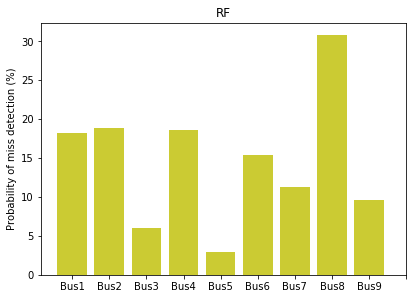

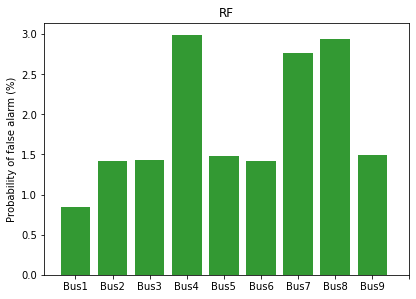

In [91]:
buses = ('Bus1', 'Bus2', 'Bus3', 'Bus4', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9')
y_pos = np.arange(len(buses)-1)
fig = plt.figure()

ACC_results = [j *100 for j in ACC]
pmd_results=[j *100 for j in pmd]
pf_results=[j *100 for j in pf]

fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, i)
ax.bar(y_pos, ACC_results, align='center', alpha=0.8, color='b')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Accuracy (%)')
ax.set_title('RF')


fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, i)
ax.bar(y_pos, pmd_results, align='center', alpha=0.8, color='y')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of miss detection (%)')
ax.set_title('RF')

fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, i)
ax.bar(y_pos, pf_results, align='center', alpha=0.8, color='g')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of false alarm (%)')
ax.set_title('RF')

In [0]:
!pip install -U git+https://github.com/scikit-multiflow/scikit-multiflow

In [93]:
#HT
from skmultiflow.trees import RegressionHAT
ht=RegressionHAT()
ht.fit(X_train,y_train)
ht_prediction=rf.predict(X_test)
accuracy_ht=accuracy_score(y_test,ht_prediction)
print("Accuracy (%): "+str(accuracy_ht))


#confusion matrix
cnf_matrix = confusion_matrix(y_test, ht_prediction)

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)


FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)


/usr/local/lib/python3.6/dist-packages/skmultiflow/trees/hoeffding_adaptive_tree_regressor.py:20: FutureWarning: 'RegressionHAT' has been renamed to 'HoeffdingAdaptiveTreeRegressor' in v0.5.0.
The old name will be removed in v0.7.0
  "The old name will be removed in v0.7.0", category=FutureWarning)


Accuracy (%): 0.8956689300789136


Text(0.5, 1.0, 'HT')

<Figure size 432x288 with 0 Axes>

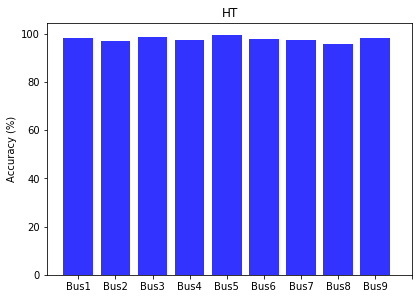

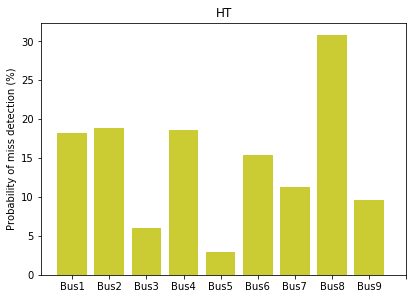

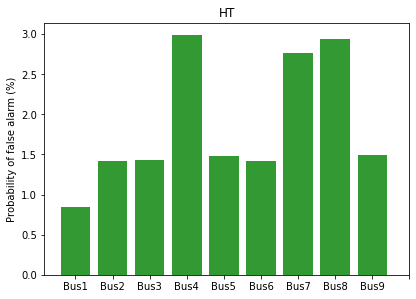

In [94]:
buses = ('Bus1', 'Bus2', 'Bus3', 'Bus4', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9')
y_pos = np.arange(len(buses)-1)
fig = plt.figure()

ACC_results = [j *100 for j in ACC]
pmd_results=[j *100 for j in pmd]
pf_results=[j *100 for j in pf]

fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, i)
ax.bar(y_pos, ACC_results, align='center', alpha=0.8, color='b')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Accuracy (%)')
ax.set_title('HT')


fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, i)
ax.bar(y_pos, pmd_results, align='center', alpha=0.8, color='y')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of miss detection (%)')
ax.set_title('HT')

fig = plt.figure()
fig.subplots_adjust( right=3, top=1)
ax = fig.add_subplot(1, 3, i)
ax.bar(y_pos, pf_results, align='center', alpha=0.8, color='g')
ax.set_xticks(np.arange(len(buses)))
ax.set_xticklabels(('Bus1', 'Bus2', 'Bus3', 'Bus4','Bus5','Bus6','Bus7','Bus8','Bus9'), minor=False)
ax.set_ylabel('Probability of false alarm (%)')
ax.set_title('HT')